In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from IPython.display import Image 
from io import StringIO
import pydotplus
from sklearn import preprocessing
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_score
import sklearn.model_selection as ms
import sklearn.metrics as sklm
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('BankFailures.csv')
data.head()
data = data.dropna()
print(data.shape)
print(list(data.columns)) 

(9096, 11)
['failure', 'tier1capital_wt', 'loan_asset_wt', 'oca_wt', 'roa_wt', 'liquidity_wt', 'creditrisk_wt', 'diversification_wt', 'chargeoff_rate_wt', 'income_msa', 'ur']


In [3]:
data.head()

failure  tier1capital_wt  loan_asset_wt    oca_wt    roa_wt  liquidity_wt  \
0        0         0.139902       0.507503  0.032303  0.010864      0.471579   
1        0         0.131395       0.538687  0.031620  0.013486      0.430785   
2        0         0.129813       0.528314  0.033475  0.013251      0.451883   
3        0         0.111267       0.599078  0.035557  0.013541      0.337225   
4        0         0.113487       0.564300  0.030603  0.013624      0.298013   

   creditrisk_wt  diversification_wt  chargeoff_rate_wt  income_msa        ur  
0       0.001372            0.271673           0.000731   2724394.0  4.902080  
1       0.003179            0.309092           0.001798   2915506.0  4.830880  
2       0.007252            0.306447           0.007102   3105725.0  4.638185  
3       0.005050            0.326740           0.004456   3322907.0  3.861916  
4       0.002735            0.291908           0.003476   3468509.0  3.630166

## Pairwise correlations.

In [4]:
data.corr(method='pearson', min_periods=1)

failure  tier1capital_wt  loan_asset_wt    oca_wt  \
failure             1.000000        -0.014277      -0.041015 -0.016961   
tier1capital_wt    -0.014277         1.000000      -0.073789 -0.043558   
loan_asset_wt      -0.041015        -0.073789       1.000000  0.891538   
oca_wt             -0.016961        -0.043558       0.891538  1.000000   
roa_wt             -0.182427         0.054637       0.791704  0.766291   
liquidity_wt       -0.035320         0.243700       0.628456  0.619759   
creditrisk_wt       0.384379        -0.068351       0.007890  0.125408   
diversification_wt  0.100639        -0.126545      -0.009312  0.248102   
chargeoff_rate_wt   0.395274        -0.019802      -0.002508  0.138619   
income_msa          0.212615        -0.029512      -0.048223 -0.020949   
ur                  0.224509         0.020182      -0.055500 -0.021556   

                      roa_wt  liquidity_wt  creditrisk_wt  diversification_wt  \
failure            -0.182427     -0.035320       0.384379            0.100639   
tier1capital_wt     0.054637      0.243700      -0.068351           -0.126545   
loan_asset_wt       0.791704      0.628456       0.007890           -0.009312   
oca_wt              0.766291      0.619759       0.125408            0.248102   
roa_wt              1.000000      0.604098      -0.300529            0.102660   
liquidity_wt        0.604098      1.000000      -0.146435           -0.098938   
creditrisk_wt      -0.300529     -0.146435       1.000000            0.231792   
diversification_wt  0.102660     -0.098938       0.231792            1.000000   
chargeoff_rate_wt  -0.244524     -0.110061       0.931284            0.252134   
income_msa         -0.024215      0.022970       0.053874            0.245459   
ur                 -0.207244      0.011591       0.292793            0.001453   

                    chargeoff_rate_wt  income_msa        ur  
failure                      0.395274    0.212615  0.224509  
tier1capital_wt             -0.019802   -0.029512  0.020182  
loan_asset_wt               -0.002508   -0.048223 -0.055500  
oca_wt                       0.138619   -0.020949 -0.021556  
roa_wt                      -0.244524   -0.024215 -0.207244  
liquidity_wt                -0.110061    0.022970  0.011591  
creditrisk_wt                0.931284    0.053874  0.292793  
diversification_wt           0.252134    0.245459  0.001453  
chargeoff_rate_wt            1.000000    0.071777  0.370003  
income_msa                   0.071777    1.000000 -0.006557  
ur                           0.370003   -0.006557  1.000000

## Counting the number of failures and non-failure cases.  

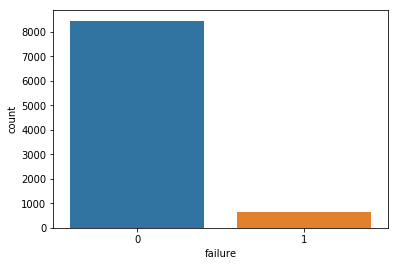

In [5]:
sns.countplot(x = 'failure', data = data)  

## Creating the dataframe. 

In [6]:
X = data.loc[:, data.columns !='failure']
y = data.failure

## Splitting the dataset.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 55) 
yt = y_test

## Using the zscore standardization method.  

In [8]:
#Standardize the dataset by subtracting the mean and dividing bythe standard deviation (i.e. we use the z-score method)
mean = X_train.mean(axis = 0)   #This ensures we calculate mean along the columns
X_train -= mean
s = X_train.std(axis = 0)
X_train /= s

X_test -= mean      #We normalize the test data using the mean and standard deviation of the train data
X_test /= s

## Computing the Decision Tree model. 

In [9]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(X_train, y_train) 

## Plotting the decision tree. 

In [10]:
def plot_decision_tree(clf,feature_name,target_name):
    dot_data = StringIO()  
    tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_name,  
                         class_names=target_name,  
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

In [11]:
plot_decision_tree(clf, X_train.columns,data.columns[1]) 

## Predicting the model. 

In [12]:
scores = clf.predict(X_test) 

## Confusion matrix.

In [13]:
pd.crosstab(scores, yt, rownames = ['Predicted'], colnames = ['Actual'], margins = True, margins_name = 'Total') 

Actual        0    1  Total
Predicted                  
0          1601   83   1684
1            85   51    136
Total      1686  134   1820

## Now we get the accuracy of the model. 

In [15]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, scores)) 

Accuracy: 0.9076923076923077
